In [4]:
import sys
sys.path.append("/home/pmitrano/catkin_ws/src/video_prediction/")

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from video_prediction.datasets import base_dataset 
from video_prediction.datasets import softmotion_dataset
from video_prediction.datasets import unity_cloth_dataset
from video_prediction.datasets import gazebo_link_bot_dataset
from video_prediction.datasets import moving_block_dataset
import json

np.set_printoptions(suppress=True, precision=4, linewidth=250)

In [9]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
sess= tf.Session(config=config)

In [49]:
# input_dir = "/home/pmitrano/catkin_ws/src/video_prediction/data/bair"
# dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/pretrained_models/bair/ours_savp/dataset_hparams.json", 'r'))
# dataset_hparams = 'sequence_length=30'

In [97]:
input_dir = "/home/pmitrano/catkin_ws/src/link_bot/link_bot_data/data/gzvp_d09a13d3f5_5120/"
dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/hparams/gazebo_link_bot/dataset_hparams.json", 'r'))
dataset_hparams = 'sequence_length=30'
dataset = gazebo_link_bot_dataset.GazeboLinkBotDataset(input_dir, mode="train", seed=0, num_epochs=1, hparams_dict=dataset_hparams_dict, hparams=dataset_hparams)

In [72]:
input_dir = "/home/pmitrano/catkin_ws/src/link_bot/link_bot_data/data/moving_block/"
dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/hparams/moving_block/dataset_hparams.json", 'r'))
dataset_hparams = 'sequence_length=30'
dataset = moving_block_dataset.MovingBlockDataset(input_dir, mode="test", seed=0, num_epochs=1, hparams_dict=dataset_hparams_dict, hparams=dataset_hparams)

In [98]:
inputs = dataset.make_batch(8)

In [99]:
list(inputs.keys())

['images', 'states', 'actions']

In [104]:
outputs = sess.run(inputs)

In [105]:
image0 = outputs['images'][0]
state0 = outputs['states'][0]
u0 = outputs['actions'][0]

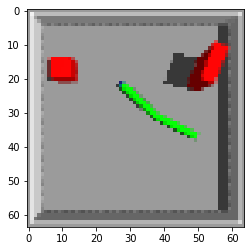

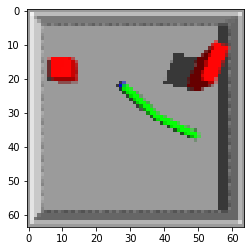

In [106]:
plt.figure()
plt.imshow(image0[0])
plt.figure()
plt.imshow(image0[1])
plt.imsave('0.png', image0[0])
plt.imsave('1.png', image0[1])

In [107]:
print('{},{}.format'state0[0])
print(state0[1])
print("=======")
for u in u0[:9]:
    print('{:.3f},{:.3f}'.format(u[0], u[1]), end=',')

[-0.0694  0.1714]
[-0.0666  0.1676]
-0.150,0.088,0.150,-0.150,0.150,-0.150,0.150,-0.150,

In [70]:
for t in range(30):
    plt.imsave('{}.png'.format(t), image0[t])

In [96]:
# bad_images=0
inputs = dataset.make_batch(16)
try:
    while True:
        outputs = sess.run(inputs)
        images = outputs['images']
        for batch_idx, time_step in np.ndindex(16, 30):
            plt.imsave('{}_{}.png'.format(batch_idx, time_step), images[batch_idx, time_step])
#         images_flat = images.reshape(8*30, 64*64*3)
#         if np.any(images_flat.min(axis=1) == images_flat.max(axis=1)):
#             bad_images += 1
except tf.errors.OutOfRangeError as e:
    pass
# print(bad_images)

Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.


KeyboardInterrupt: 

In [ ]:
print(u0)
plt.figure()
plt.plot(u0[:, 0:2])
plt.figure()
plt.plot(u0[:, 2:4])
;

In [ ]:
print(state0)
plt.plot(state0);

In [ ]:
plt.plot(state0[:, 0], state0[:, 1]);
plt.axis("equal")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state0[:,0], state0[:,1], state0[:,2])
plt.show()